# MaterialsCoord benchmarking – binary materials scores

Benchmark and plot the results of the near neighbor algorithms on binary structures.

*Written using:*
- MaterialsCoord==0.1.0

*Authors: Hillary Pan, Alex Ganose (10/12/19)*

---

First, lets initialize the near neighbor methods we are interested in.

In [1]:
from pymatgen.analysis.local_env import BrunnerNN_reciprocal, EconNN, JmolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, CrystalNN

nn_methods = [
    MinimumDistanceNN(),  MinimumOKeeffeNN(), MinimumVIRENN(), JmolNN(), 
    EconNN(), BrunnerNN_reciprocal(), VoronoiNN(tol=0.5), CrystalNN()
]

Next, import the benchmark and choose the elemental structure set.

In [2]:
from materialscoord.core import Benchmark

structure_groups = ["common_binaries"]

bm = Benchmark.from_structure_group(structure_groups)

Calculate the benchmark scores for each algorithm for the cation sites.

In [3]:
cation_scores = bm.score(nn_methods, site_type="cation")
cation_scores

/Users/alex/dev/src/pymatgen/pymatgen/analysis/local_env.py:3951: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn(
/Users/alex/dev/src/pymatgen/pymatgen/analysis/local_env.py:3745: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  warnings.warn(


,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
Cu5Zn8_gamma_brass_2092,2.769231,3.923077,2.769231,1.230769,0.0,0.0,0.000000,0.461538
Th3P4_25724,0.000000,8.000000,8.000000,8.000000,0.0,0.0,0.000000,0.000000
ZnS_wurtzite_67453,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NiAs_5245,2.000000,0.000000,2.000000,2.000000,2.0,2.0,2.000000,0.000000
TiO2_rutile_9852,0.000000,0.000000,0.000000,4.000000,0.0,0.0,0.000000,0.000000
NaCl_rocksalt_100633,0.000000,0.000000,0.000000,6.000000,0.0,0.0,0.000000,0.000000
Al2O3_corundum_9770,0.000000,1.000000,0.000000,7.000000,0.0,0.0,0.000000,0.000000
CsCl_53847,0.000000,14.000000,6.000000,8.000000,6.0,6.0,0.000000,0.000000
Fe3O4_inv_spinel_26410,0.000000,4.000000,0.000000,4.000000,0.0,0.0,0.000000,0.000000
ZnS_sphalerite_651455,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


Plot the cation results.

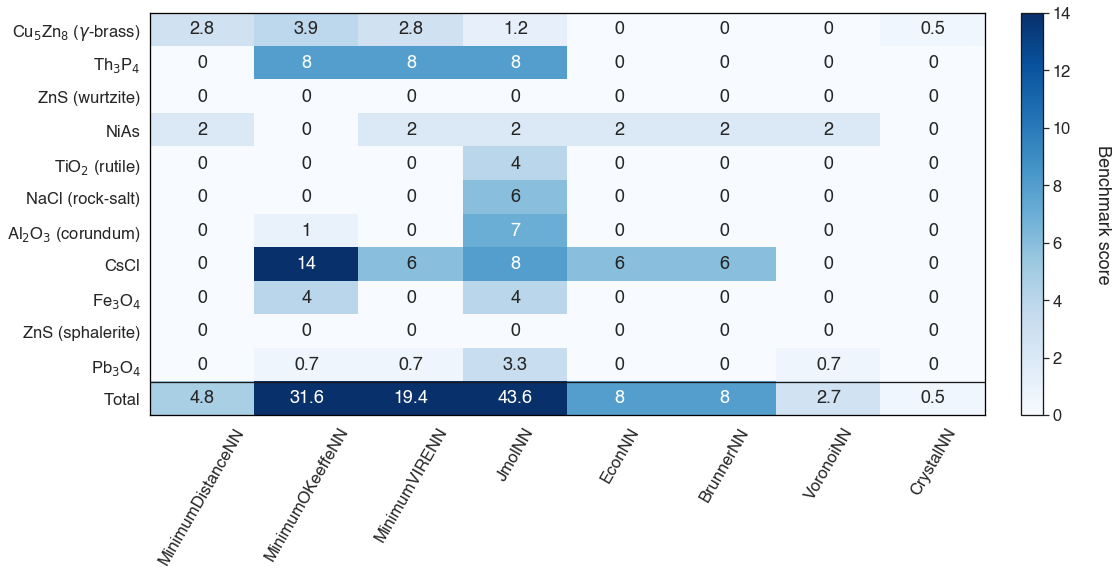

In [4]:
from pathlib import Path

from materialscoord import structure_mapping
from materialscoord.plot import plot_benchmark_scores

nn_method_mapping = {"BrunnerNN_reciprocal": "BrunnerNN"}

plt = plot_benchmark_scores(
    cation_scores, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping
)

plt.savefig(Path("plots", "binary-cation.pdf"), bbox_inches='tight')
plt.show()

Calculate the benchmark scores for each algorithm for the anion sites.

In [5]:
anion_scores = bm.score(nn_methods, site_type="anion")
anion_scores

,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
Cu5Zn8_gamma_brass_2092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Th3P4_25724,3.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0
ZnS_wurtzite_67453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NiAs_5245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TiO2_rutile_9852,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
NaCl_rocksalt_100633,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
Al2O3_corundum_9770,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
CsCl_53847,0.0,0.0,0.0,8.0,6.0,6.0,0.0,0.0
Fe3O4_inv_spinel_26410,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
ZnS_sphalerite_651455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plot the anion results.

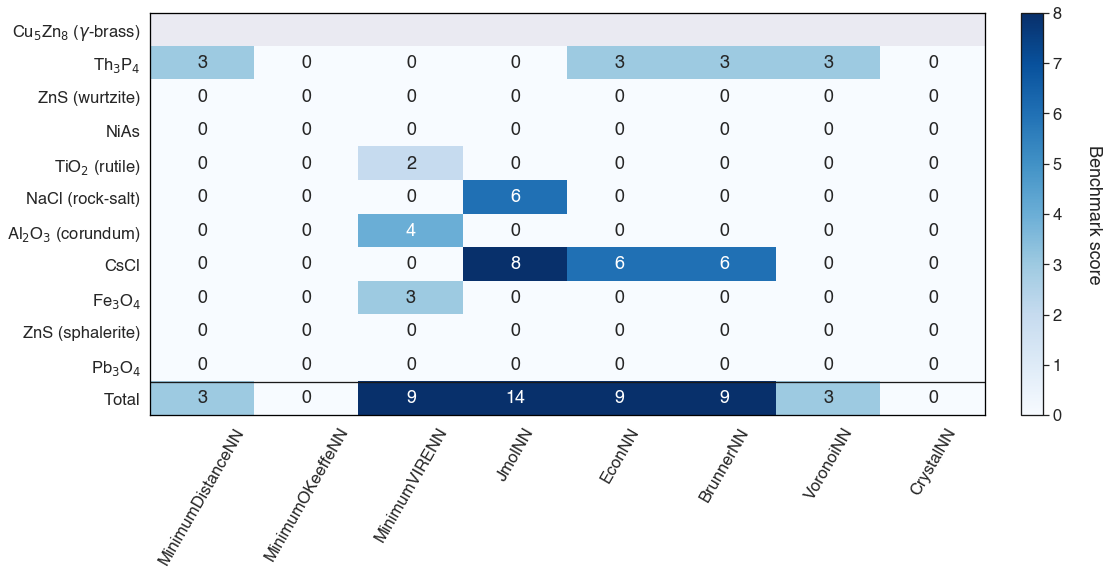

In [6]:
plt = plot_benchmark_scores(
    anion_scores, 
    structure_mapping=structure_mapping,
    nn_method_mapping=nn_method_mapping
)

plt.savefig(Path("plots", "binary-anion.pdf"), bbox_inches='tight')
plt.show()